In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("./bank/bank.csv",sep=";")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


# EXPLORATORY DATA ANALYSIS

In [6]:
sns.set_style("whitegrid")

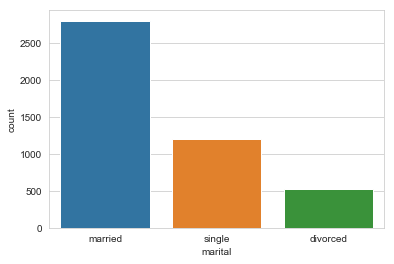

In [7]:
sns.countplot(x="marital",data=df)

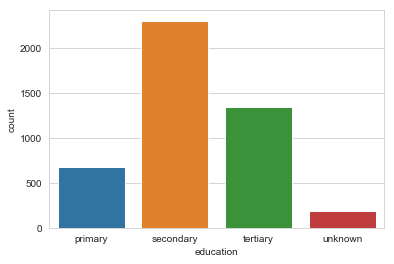

In [8]:
sns.countplot(x="education",data=df)

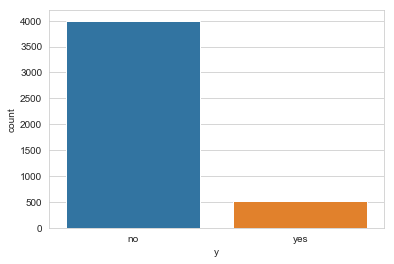

In [9]:
sns.countplot(x="y",data=df)

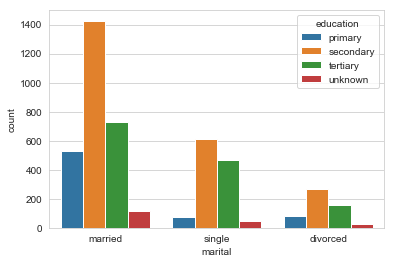

In [10]:
sns.countplot(x="marital",hue="education",data=df)

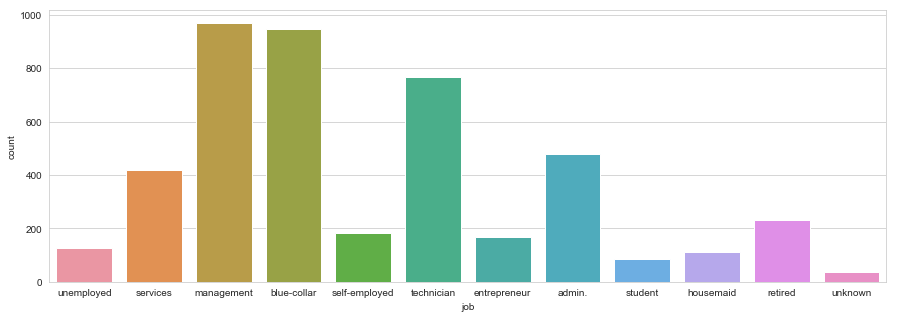

In [11]:
plt.figure(figsize=((15,5)))
sns.countplot(x="job",data=df)


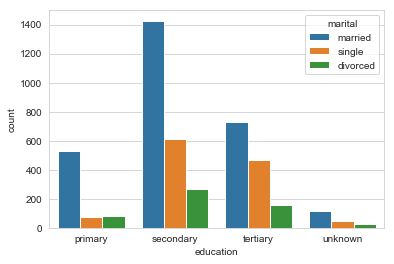

In [12]:
sns.countplot(x="education",hue="marital",data=df)

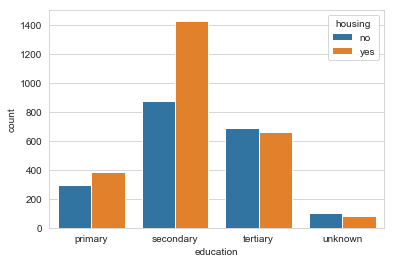

In [13]:
sns.countplot(x="education",hue="housing",data=df)

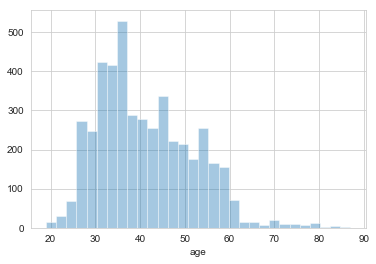

In [14]:
sns.distplot(df["age"],kde=False,bins=30)

C:\Users\Simran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


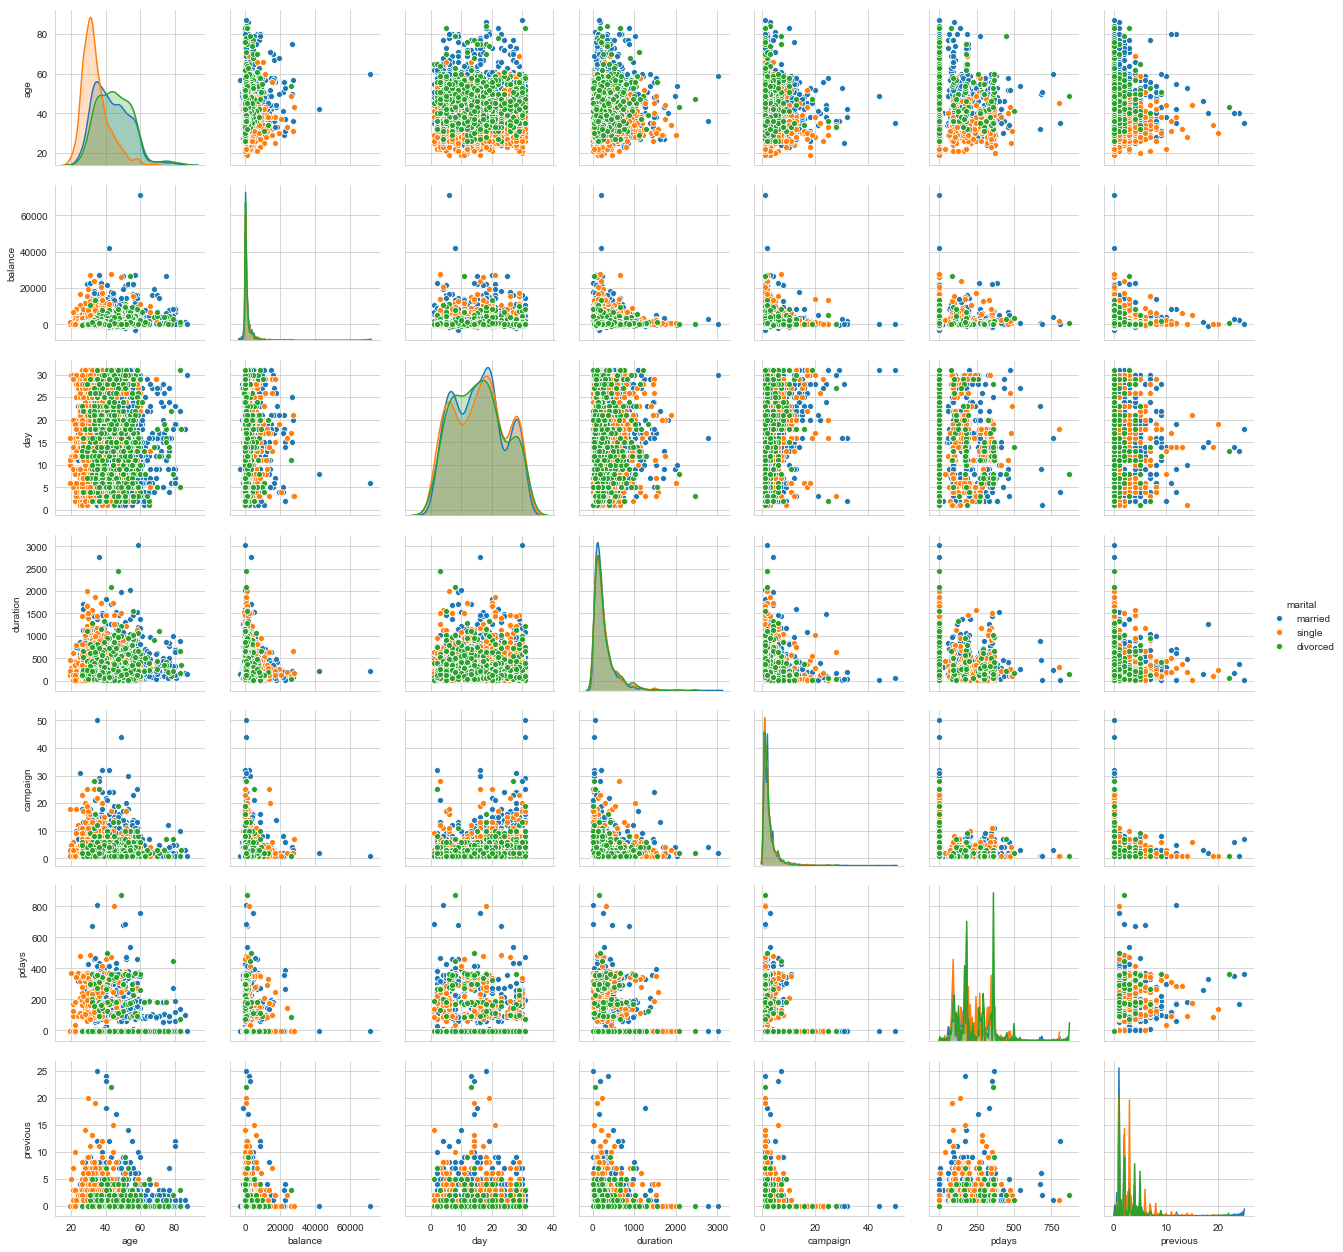

In [15]:
sns.pairplot(df,hue="marital")

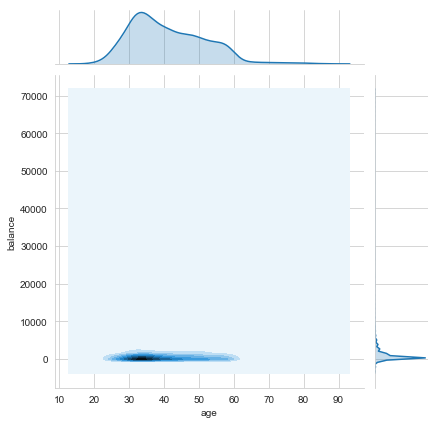

In [16]:
sns.jointplot(x="age",y="balance",data=df,kind="kde")

# Cleaning Data

In [17]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


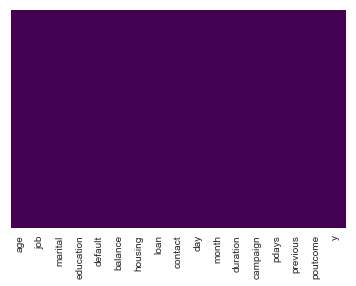

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [19]:
df.isnull().any(axis=0)

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [20]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [21]:
dummies=pd.get_dummies(data=df, columns=['job', 'marital','education','default','housing','loan','contact','month','poutcome','y'],drop_first=True)

In [22]:
dummies.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,59,0,5,226,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [23]:
df.drop(['job', 'marital','education','default','housing','loan','contact','month','poutcome','y'],axis=1,inplace=True)

In [24]:
df=pd.concat([df,dummies],axis=1)

In [25]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,age,balance,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,30,1787,19,...,0,0,0,0,1,0,0,0,1,0
1,33,4789,11,220,1,339,4,33,4789,11,...,0,0,1,0,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,35,1350,16,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,30,1476,3,...,1,0,0,0,0,0,0,0,1,0
4,59,0,5,226,1,-1,0,59,0,5,...,0,0,1,0,0,0,0,0,1,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 50 columns):
age                    4521 non-null int64
balance                4521 non-null int64
day                    4521 non-null int64
duration               4521 non-null int64
campaign               4521 non-null int64
pdays                  4521 non-null int64
previous               4521 non-null int64
age                    4521 non-null int64
balance                4521 non-null int64
day                    4521 non-null int64
duration               4521 non-null int64
campaign               4521 non-null int64
pdays                  4521 non-null int64
previous               4521 non-null int64
job_blue-collar        4521 non-null uint8
job_entrepreneur       4521 non-null uint8
job_housemaid          4521 non-null uint8
job_management         4521 non-null uint8
job_retired            4521 non-null uint8
job_self-employed      4521 non-null uint8
job_services           4521 non-n

In [27]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,age,balance,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,...,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579,41.170095,1422.657819,15.915284,...,0.117452,0.010838,0.309224,0.086043,0.017695,0.011502,0.043574,0.028534,0.819509,0.115240
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562,10.576211,3009.638142,8.247667,...,0.321994,0.103553,0.462225,0.280458,0.131856,0.106640,0.204169,0.166510,0.384638,0.319347
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,19.000000,-3313.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,33.000000,69.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,39.000000,444.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,49.000000,1480.000000,21.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,87.000000,71188.000000,31.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
df.tail()

,age,balance,day,duration,campaign,pdays,previous,age,balance,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
4516,33,-333,30,329,5,-1,0,33,-333,30,...,0,0,0,0,0,0,0,0,1,0
4517,57,-3313,9,153,1,-1,0,57,-3313,9,...,0,0,1,0,0,0,0,0,1,0
4518,57,295,19,151,11,-1,0,57,295,19,...,0,0,0,0,0,0,0,0,1,0
4519,28,1137,6,129,4,211,3,28,1137,6,...,0,0,0,0,0,0,1,0,0,0
4520,44,1136,3,345,2,249,7,44,1136,3,...,0,0,0,0,0,0,1,0,0,0


# Logistic Regression using Scikit Library

In [29]:
X=df.drop("y_yes",axis=1)
y=df["y_yes"]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logmodel=LogisticRegression()

In [34]:
logmodel.fit(X_train,y_train)

C:\Users\Simran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
predictions = logmodel.predict(X_test)

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1618
           1       0.63      0.34      0.44       191

   micro avg       0.91      0.91      0.91      1809
   macro avg       0.78      0.66      0.69      1809
weighted avg       0.89      0.91      0.90      1809



In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
confusion_matrix(y_test,predictions)

array([[1581,   37],
       [ 127,   64]], dtype=int64)

# Self Written Code of Logistic Regression

In [40]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

def cost_function(features, target, weights):
    scores = np.dot(features,weight)
    cf = np.sum( -target*scores + np.log(1 + np.exp(scores)) )
    return cf

def logistic_regression(features, target, num_steps, learning_rate,add_intercept="False"):
    if add_intercept:
        intercept = np.ones((features.shape[0],1))
        features = np.hstack((intercept, features))
    ypred=[]
    weights=np.zeros(features.shape[1])
    
    for i in range(num_steps):
        scores = np.dot(features,weights)
        predictions = sigmoid(scores)
        gradient = np.dot(features.T,predictions-target)
        weights =weights- ((learning_rate/features.shape[0]) * gradient)
        
    score_final = np.dot(features,weights)
    score_final_sigmoid=sigmoid(score_final)
    ypred=np.round(score_final_sigmoid)
    
    
    return ypred

In [41]:
i=logistic_regression(X_test,y_test,10000,0.001,add_intercept="True")



In [42]:
print(classification_report(y_test,i))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1618
           1       0.32      0.58      0.41       191

   micro avg       0.83      0.83      0.83      1809
   macro avg       0.63      0.72      0.65      1809
weighted avg       0.88      0.83      0.85      1809



In [43]:
confusion_matrix(y_test,i)

array([[1384,  234],
       [  81,  110]], dtype=int64)